In [2]:
import os
import string
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#import tensorflow as tf

In [2]:
# Naive Bayes

In [3]:
def WordCount(data):

    # 27 keys (26 letters and space)
    keys = list(string.ascii_lowercase + " ")
    
    wordcount = {}
    for letter in data:
        if letter not in wordcount:
            wordcount[letter] = 0
        wordcount[letter] += 1    

    updated_wordcount = {key: wordcount.get(key,0) for key in keys}

    return updated_wordcount

def GetData(file_name_list):

    with open("languageID/" + file_name_list[0], encoding = "utf-8") as file:
        temp_data = file.read()
    data = pd.DataFrame(WordCount(temp_data), index = [0])

    for i in range(1, len(file_name_list)):
        with open("languageID/" + file_name_list[i], encoding = "utf-8") as file:
            temp_data = file.read()
        word_doc = pd.DataFrame(WordCount(temp_data), index = [i])
        data = pd.concat([data, word_doc], axis=0)
    
    return data

def GetProb(counts, alpha = 1/2):
    prob = (counts + alpha) / (sum(counts) + len(counts) * alpha)
    return prob


In [4]:
# get all files in folder

file_name_list = [f for f in os.listdir('languageID')]

doc_nums, y = [], []
for i in range(len(file_name_list)):
    temp = file_name_list[i].split(".")[0]
    doc_nums.append(temp[1:])
    y.append(temp[0])

data = GetData(file_name_list)
data = pd.concat([pd.DataFrame({'label':y, 'doc':doc_nums}), data], axis = 1)

In [5]:
# prior prob
counts = data['label'].value_counts()
prior_prob = GetProb(counts)
log_prior_prob = np.log(prior_prob)
print(prior_prob)

label
j    0.333333
s    0.333333
e    0.333333
Name: count, dtype: float64


In [6]:
subdata = data[data['label'] == "e"]
subdata = pd.concat([subdata.sort_values(by='doc')[0:2], subdata.sort_values(by='doc')[12:]]) # training
temp = subdata.sum()[2:]

q32 = pd.concat([pd.DataFrame(GetProb(temp, alpha = 0)), pd.DataFrame(GetProb(temp, alpha = 1/2))], axis = 1)
q32.columns = ['probability', 'probability w/smoothing']
q32

,probability,probability w/smoothing
a,0.060189,0.060169
b,0.011112,0.011135
c,0.021496,0.02151
d,0.021959,0.021973
e,0.10543,0.105369
f,0.018917,0.018933
g,0.017461,0.017479
h,0.047225,0.047216
i,0.055427,0.055411
j,0.001389,0.001421


In [7]:
subdata = data[data['label'] == "j"]
subdata = pd.concat([subdata.sort_values(by='doc')[0:2], subdata.sort_values(by='doc')[12:]]) # training
temp = subdata.sum()[2:]
q33_j = pd.concat([pd.DataFrame(GetProb(temp, alpha = 0)), pd.DataFrame(GetProb(temp, alpha = 1/2))], axis = 1)
q33_j.columns = ['j_probability', 'j_probability w/smoothing']

subdata = data[data['label'] == "s"]
subdata = pd.concat([subdata.sort_values(by='doc')[0:2], subdata.sort_values(by='doc')[12:]]) # training
temp = subdata.sum()[2:]
q33_s = pd.concat([pd.DataFrame(GetProb(temp, alpha = 0)), pd.DataFrame(GetProb(temp, alpha = 1/2))], axis = 1)
q33_s.columns = ['s_probability', 's_probability w/smoothing']

pd.concat([q33_j, q33_s], axis = 1)

,j_probability,j_probability w/smoothing,s_probability,s_probability w/smoothing
a,0.131855,0.131766,0.104617,0.10456
b,0.010842,0.010867,0.008209,0.008233
c,0.005456,0.005486,0.037526,0.037526
d,0.017208,0.017226,0.039748,0.039746
e,0.060227,0.060205,0.113875,0.113811
f,0.003847,0.003879,0.008579,0.008603
g,0.01399,0.014012,0.00716,0.007184
h,0.031757,0.031762,0.004506,0.004533
i,0.09709,0.097033,0.04987,0.04986
j,0.002308,0.002341,0.006604,0.006629


In [8]:
pd.set_option('display.max_columns', None)
x = data[(data['label'] == 'e') & (data['doc']== '10')].iloc[:,2:]
x

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,
42,164,32,53,57,311,55,51,140,140,3,6,85,64,139,182,53,3,141,186,225,65,31,47,4,38,2,498


In [9]:
p_e = q32.iloc[:,1].astype(float)
p_j = q33_j.iloc[:,1].astype(float)
p_s = q33_s.iloc[:,1].astype(float)

In [10]:
def CondProb(p_e, p_j, p_s, x):
    log_prob = [np.sum(np.log(p_e) * x), np.sum(np.log(p_j) * x), np.sum(np.log(p_s) * x)]
    pred_label = np.array(["e","j","s"])[np.argmax(log_prob)]
    return log_prob, pred_label

# predicted probability based on bayes rule (prior not included due to the same prior probs)
CondProb(p_e, p_j, p_s, x.values[0])

([-7841.865447060635, -8771.433079075032, -8467.282044010557], 'e')

In [11]:
# test data
subdata = data[data['label'] == "e"]
subdata = subdata.sort_values(by='doc')[2:12]
subdata2 = data[data['label'] == "j"]
subdata = pd.concat([subdata, subdata2.sort_values(by='doc')[2:12]])
subdata3 = data[data['label'] == "s"]
subdata = pd.concat([subdata, subdata3.sort_values(by='doc')[2:12]])

pred_labels = []
for i in range(len(subdata)):
    pred_labels.append(CondProb(p_e, p_j, p_s, subdata.iloc[i][2:].values)[1])    

true_labels = subdata['label'].values

confusion_matrix = np.zeros((3, 3))
for true, pred in zip(true_labels, pred_labels):
    if pred == "e" and true == "e":
        confusion_matrix[0,0] += 1
    elif pred == "e" and true == "j":
        confusion_matrix[0,1] += 1        
    elif pred == "e" and true == "s":
        confusion_matrix[0,2] += 1                
    elif pred == "j" and true == "e":
        confusion_matrix[1,0] += 1        
    elif pred == "j" and true == "j":
        confusion_matrix[1,1] += 1        
    elif pred == "j" and true == "s":
        confusion_matrix[1,2] += 1        
    elif pred == "s" and true == "e":
        confusion_matrix[2,0] += 1        
    elif pred == "s" and true == "j":
        confusion_matrix[2,1] += 1                
    elif pred == "s" and true == "s":
        confusion_matrix[2,2] += 1                        
confusion_matrix        

array([[10.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.]])

In [ ]:
# Neural Network

In [5]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/joowonlee/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
y_train = np.array(y_train).astype(int)

n, d = X_train.shape
d1 = 300
k = 10

h = 28 # the number of hidden units
w1 = np.random.randn(d1, d)
w2 = np.random.randn(k, d1)

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    e_z = np.exp(z) 
    return e_z / e_z.sum()

def cross_entropy_loss(y, y_hat):
    new_y = np.zeros(10)
    new_y[y] = 1
    return -np.sum(new_y * np.log(y_hat))

# Forward 
def Forward(x, w1, w2):
    z1 = np.dot(w1, x) # d1 x 1
    a = sigmoid(z1) 
    z2 = np.dot(w2, a) # k x 1
    y_hat = softmax(z2)
    return a, y_hat

# Backpropagation
def backward(w1, w2, x, y, a, y_hat):
    new_y = np.zeros(10)
    new_y[int(y)] = 1
    delta2 = y_hat - new_y # k x 1
    dW2 = np.outer(delta2, a) # k x d1
    delta1 = np.dot(w2.T, delta2) * a * (1 - a) # d1 x 1
    dW1 = np.outer(delta1, x.T) # d1 x d
    return dW1, dW2

In [8]:
n_iter = 200

# Pick a learning rate 'alpha'
learning_rate = 0.1

# minibatch size
batch = 64

# Obtain initial cost
loss_old = 1000000
diff_loss = 1
track_loss = []

i = 0
while i < n_iter and loss_old > 1 and diff_loss > 0.0001:

    # Shuffle the dataset for stochastic gradient descent
    shuffle_indices = np.random.permutation(n)
    sum_dW1, sum_dW2 = 0, 0
    
    for j in shuffle_indices[0:batch]:
        
        x = np.array(X_train.iloc[j])
        y = y_train[j]

        # Forward pass
        a, y_hat = Forward(x, w1, w2)

        # Calculate loss
        loss = cross_entropy_loss(y, y_hat)

        # Backward pass
        dW1, dW2 = backward(w1, w2, x, y, a, y_hat)
        sum_dW1 += dW1
        sum_dW2 += dW2
        
    # Update weights and biases
    w1 -= learning_rate * sum_dW1/batch
    w2 -= learning_rate * sum_dW2/batch
        
    # output
    output_a = sigmoid(np.dot(X_train, w1.T)) # n x d1
    output = softmax(np.dot(output_a, w2.T)) # n x k
    
    # loss calculation
    loss_new = 0
    for j in range(len(y_train)):
        loss_new += cross_entropy_loss(y_train[j], output[j])
    diff_loss = abs(loss_old - loss_new)
    loss_old = loss_new
    print(i, loss_old)

    if i % 10 == 0:
        track_loss.append(loss_old)    
    
    i += 1

track_loss.append(loss_old)

/var/folders/98/gq7_t55j62v7jbmngfldbqs80000gn/T/ipykernel_11999/833059606.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


0 2247455.0352960066
1 2168605.5805212967
2 2080208.6637301706
3 2012161.1423346933
4 1978001.694119834
5 1925016.1456752764
6 1924310.0903544633
7 1839381.935201968
8 1794615.2617308097
9 1771583.5590785933
10 1810310.202001031
11 1722411.6018239565
12 1831121.9897148276
13 1797037.2044657234
14 1832087.2451497102
15 1765132.406338417
16 1746577.3123243582
17 1769657.1135487345
18 1762864.3403374064
19 1721454.4593111076
20 1794038.5775256867
21 1683468.2286407095
22 1667981.78354452
23 1683082.9642062369
24 1664925.8461422806
25 1653817.9818285399
26 1618835.5749674616
27 1610819.467529964
28 1606672.0995883066
29 1630864.9433707986
30 1612553.8804299082
31 1766324.436525578
32 1734335.764572984
33 1636188.1274919917
34 1619034.5072924842
35 1604520.8298584297
36 1627886.1739230151
37 1588230.880282215
38 1558332.3496896815
39 1549484.0633444532
40 1527144.4128712416
41 1512454.670170233
42 1506100.196114059
43 1504383.2997971245
44 1497002.2911285611
45 1515892.0135821346
46 1518536

In [9]:
# test
output_a = sigmoid(np.dot(X_test, w1.T)) 
output = softmax(np.dot(output_a, w2.T)) 
pred_labels = [np.argmax(output[i]) for i in range(len(output))]

conf_m = confusion_matrix(np.array(y_test).astype(int), pred_labels)
print(conf_m)
print("Test Error:", np.round(1- np.trace(conf_m)/np.sum(conf_m), 4))

[[ 826    1  100   52   29  141   97   45   27   25]
 [   5 1165  134   17   36   57   27   73   84    2]
 [  62   94  610  113   75   42  118   91  141   34]
 [  28   25   99  740   40  199  106   95   73   28]
 [   5   24   56   27  653   78   70   70   96  216]
 [  38   25   26  196   81  450  108   77  150  122]
 [  70   31   76   30  116   57  931   35   32   18]
 [  32   30   56   43  124   59   11  872   76  200]
 [  20   47  119  215   51  162   84   94  478   87]
 [   9   28   21   33  215  106   24  331  100  553]]
Test Error: 0.4801


/var/folders/98/gq7_t55j62v7jbmngfldbqs80000gn/T/ipykernel_11999/833059606.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


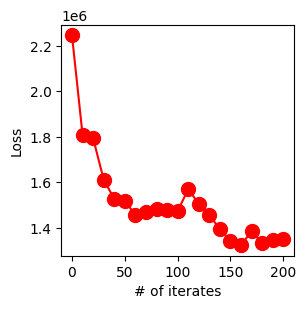

In [10]:
plt.figure(figsize=(3,3))
plt.scatter(np.arange(0, 210, 10), track_loss, label='O', color='red', marker='o', s=100)
plt.plot(np.arange(0, 210, 10), track_loss, color='red', linestyle='-')

plt.ylabel('Loss')
plt.xlabel('# of iterates')
plt.show()